_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - Nguyen Y-Quynh (group A2)
 - Cossoul Lucile (group A2)

## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1790).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [22]:
# Import some useful libraries and functions

import numpy as np
import pandas
import matplotlib.pyplot as plt

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [23]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp1/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
### Explore the dataset

- how many examples are there in the dataset?
- how many features for each example?
- what is the ground truth of the 10th example
</div>
<!-- Question End -->

In [24]:
# load the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features -  all rows with all elements in rows except last one
Y = dataset[:, -1]  # ground truth - last element in all rows

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


In [25]:
# TODO : explore the dataset

#- how many examples are there in the dataset
print(len(dataset))  
#- how many features for each example?
print(len(X[0]))  
#- what is the ground truth of the 10th example
print(Y[9])

308
6
1.83


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

There are 308 examples in the dataset, they each have 6 features. The ground truth of the 10th example is 1.83.

</div>
<!-- Answer Section End -->

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
The following command adds a column to the inputs.

- what is in the value added this column?
- why are we doing this?
</div>
<!-- Question End -->

In [26]:
print(X[5])
print_stats(X)

#winsert a new column with ones for the calculation of hw(x)
X = np.insert(X, 0, np.ones((len(X))), axis= 1)

print_stats(X)

#a value of 1 was inserted in the first column 
print(X[5])

[-2.3    0.568  4.78   3.99   3.17   0.25 ]
                0           1           2           3           4           5
count  308.000000  308.000000  308.000000  308.000000  308.000000  308.000000
mean    -2.381818    0.564136    4.788636    3.936818    3.206818    0.287500
std      1.513219    0.023290    0.253057    0.548193    0.247998    0.100942
min     -5.000000    0.530000    4.340000    2.810000    2.730000    0.125000
25%     -2.400000    0.546000    4.770000    3.750000    3.150000    0.200000
50%     -2.300000    0.565000    4.780000    3.955000    3.150000    0.287500
75%     -2.300000    0.574000    5.100000    4.170000    3.510000    0.375000
max      0.000000    0.600000    5.140000    5.350000    3.640000    0.450000
           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219  

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

- what is in the value added this column? 
    1,  (before the first feature)
- why are we doing this? 
    we are adding a term for the bias to make it more simple for calculating the hw(x). 
</div>
<!-- Answer Section End -->

## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Complete the code snippet below to:
  - create the vector of weight `w`, initialize to arbitrary values (we suggest 0)
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples
</div>
<!-- Question End -->

In [27]:
# TODO
w = np.zeros((len(X[0])))

def h(w, x):
    return np.sum(w * x) #the bias in included thanks to the 1 column inserted


#  ground truth and the evaluation of h_w on the first example
print(X[0]) 
print(h(w,X[0]))
print(Y[0], "\n")

print(X[1]) 
print(h(w,X[1]))
print(Y[1], "\n")


print(X[2]) 
print(h(w,X[2]))
print(Y[2])

[ 1.   -5.    0.6   4.78  4.24  3.15  0.35]
0.0
8.62 

[ 1.    -5.     0.565  4.77   3.99   3.15   0.15 ]
0.0
0.18 

[ 1.    -2.3    0.565  4.78   5.35   2.76   0.15 ]
0.0
0.29


## Loss function
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.
</div>
<!-- Question End -->

In [28]:
# TODO
#we square the difference because it's Loss2
def loss(w, x, y):
    return (y - h(w,x))**2

loss(w,X[0], Y[0])

74.30439999999999

## Empirical loss
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.
</div>
<!-- Question End -->

In [29]:
# TODO
def emp_loss(w, X, Y):
    sum = 0
    for  i in range(len(X)):
        sum+=loss(w, X[i], Y[i])
    return sum/len(X)
    
emp_loss(w, X, Y)

339.2467464285712

## Gradient update

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

(you can look at slide 18 of the perceptron lecture slides for an example)
</div>
<!-- Question End -->

In [30]:
# TODO
def compute_update(w, X, Y, alpha):
    sum=0
    for j in range(len(X)):
        for k in range(len(X[0])):
            sum+=(Y[j]-h(w,X[j])) * X[j][k]
            w[k] = w[k] + alpha * sum 
    return w

w=np.zeros(len(X[0]))
compute_update(w, X, Y, alpha = 10e-7)

array([1.83836259, 1.83766206, 1.83763895, 1.83746096, 1.83720017,
       1.83704232, 1.83739439])

## Gradient descent
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights
</div>
<!-- Question End -->

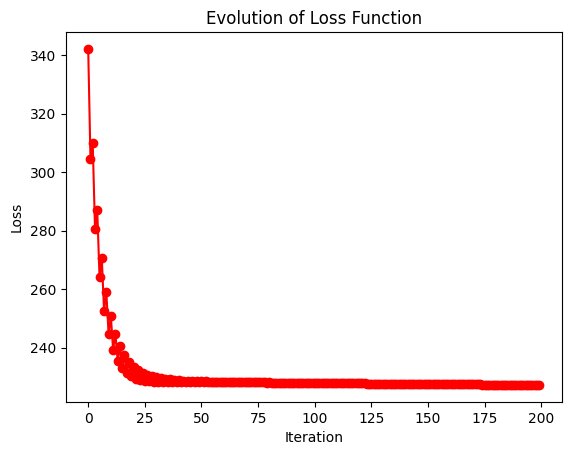

In [31]:
# TODO

loss_values = []

def descent(w_init, X, Y, alpha, max_iter):
    i=0 
    w=w_init
    while (i<max_iter) :
        w = compute_update(w,X,Y, alpha)
        current_loss = emp_loss(w, X, Y)
        # Ajouter la perte à la liste des valeurs de perte
        loss_values.append(current_loss)
        i+=1
    return w

w=np.zeros(len(X[0]))
descent (w,X,Y,10e-7, 200)


   

# Tracer l'évolution de la perte au cours des itérations
plt.plot(loss_values, 'ro-')
plt.title('Evolution of Loss Function')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
        

## Exploitation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?
</div>
<!-- Question End -->

In [32]:
# TODO

def test(alpha,nb_iter,X):
    w=np.zeros(len(X[0]))
    w=descent (w,X,Y,alpha, nb_iter)

    loss = emp_loss(w,X,Y)
    print("Alpha :", alpha, " , Nb_iter", nb_iter,  "Loss: ", loss)
    return w    

#for i in range(5):
#    for j in range(5):
#        test(10e-5*10**(-j), i*100,X)
#    print("\n")

#best model
u=test(10e-5, 1000,X)
print(u)

Alpha : 0.0001  , Nb_iter 1000 Loss:  171.56233784734553
[-12.0086359    0.67512574   1.30631886   3.14108533   0.04678332
   0.64672888  31.99651824]


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">



- Visualize the evolution of the loss on the training set. Has it converged?
    Yes, it converges.

- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
    A reasonable choice for alpha is 10e-5 and max_iter is 1000. 
    We can increase the number of iterations, but we might overfit the training set and the calculating time is getting significant for a reduced improvement of the loss.

- What is the loss associated with the final model? 
    171.56,  which is slightly higher than the initial value but still within an acceptable range considering the high number of outliers.
    
- Is the final model the optimal one for a perceptron?  
    We can always improve our model by increasing the number of iterations or using a different alpha but for our computer with a limited amount of resources, it is reasonable. We cannot test all of the combinations of alpha and number of iterations. 
    In any case, this perceptron only has one layer and can not learn complex patterns like multi layers perceptron do. 



</div>
<!-- Answer Section End -->

Text(0, 0.5, 'f(examples)')

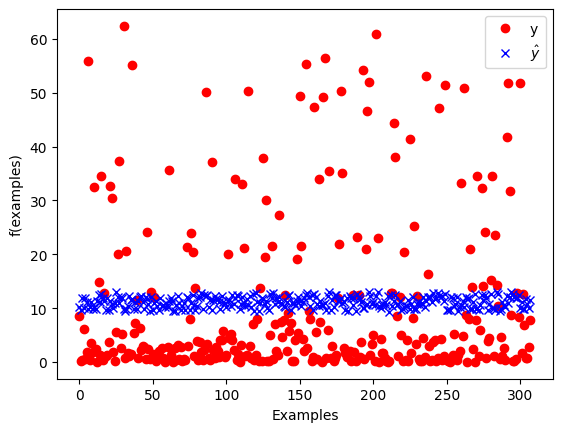

In [33]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
import matplotlib.pyplot as plt


num_samples_to_plot = 308
#plots original y
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')  
yw = [h(w,x) for x in X]
#plots updated y with new w
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')  
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")






# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.


### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?
</div>
<!-- Question End -->


### Improvements to gradient descent

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations
</div>
<!-- Question End -->


Alpha : 0.0001  , Nb_iter 1000 Loss:  81.0067541220502


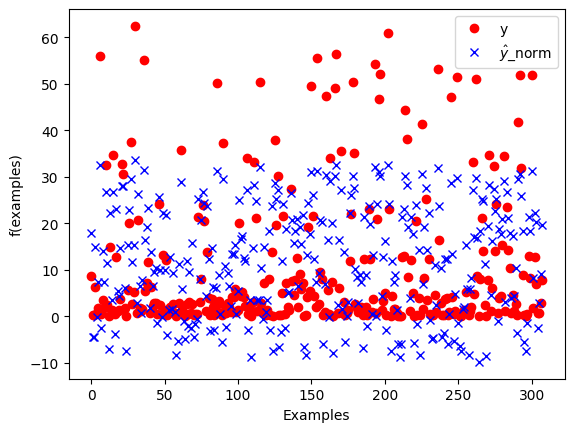

In [34]:
#TODO
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1)
sc = StandardScaler(copy=True)
X_normalized = sc.fit_transform(X)
X_normalized = np.insert(X_normalized, 0, np.ones((len(X_normalized))), axis= 1)
#print_stats(X_normalized)


w=test(10e-5, 1000,X_normalized)
#print(w)

num_samples_to_plot = 308
#plots original y
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')  
yw = [h(w,x) for x in X_normalized]
#plots updated y with new w
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$_norm')  
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")
plt.show()


In [39]:
# - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
# - Detection of convergence to halt the algorithm before the maximum number of iterations
import numpy as np
from random import shuffle

def compute_update_stoch(w, x, y, alpha):
    for k in range(len(x)):
        w[k] = w[k] + alpha * (y - h(w,x)) * x[k]
    return w

def sgd(data, labels, alpha, max_iter):
    w = np.zeros(len(data[0]))
    i=0
    while (i<max_iter):
        for j in range(len(data)):
            w = compute_update_stoch(w, data[j], labels[j], alpha)
        i+=1
    return w


# Training with SGD
alpha = 0.5
max_iter = 200

sgdw = sgd(X_normalized, Y, alpha, max_iter)
print("\nTrained Weights with SGD: ", sgdw)
# Checking if it is correctly classified all points
for i in range(4):
    print("Prediction for ", X_normalized[i], " is ", h(sgdw, X_normalized[i]))


Trained Weights with SGD:  [-3.27739166e+229  0.00000000e+000 -1.36420801e+229  9.58435431e+229
  4.42532077e+230 -4.46553569e+230 -4.40135342e+230 -8.20586838e+229]
Prediction for  [ 1.          0.         -1.73302265  1.5423783  -0.03418367  0.55395671
 -0.2294799   0.62017367]  is  -7.369201821061177e+229
Prediction for  [ 1.          0.         -1.73302265  0.03714219 -0.07376475  0.09717082
 -0.2294799  -1.36438208]  is  1.3135432355430167e+230
Prediction for  [ 1.          0.          0.05415696  0.03714219 -0.03418367  2.58208609
 -1.80462994 -1.36438208]  is  -2.918792049635943e+230
Prediction for  [ 1.          0.         -1.73302265  1.5423783  -0.03418367  0.55395671
 -0.2294799   0.3721042 ]  is  -5.333576408085716e+229


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

Is the convergence faster ? 
Yes, it is. We obtain a loss of 81 with the same variables as our best model which gave us a loss of 171. It converges way faster. 

Try to quantify this speed-up. What about accuracy ?
The accuracy is very lacking. We can see on the graph that the updated y are spread everywhere. 







</div>
<!-- Answer Section End -->